<a href="https://colab.research.google.com/github/Daksaweaomegg10/AI_ML/blob/main/Projects/Project_8_GoldPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
# loading our dataframe
df = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
df.shape

(2290, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
df.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
#checking correlation
#droping date column
df = df.drop(['Date'],axis=1)
correlation=df.corr()

In [ ]:
#heatmap

<Axes: >

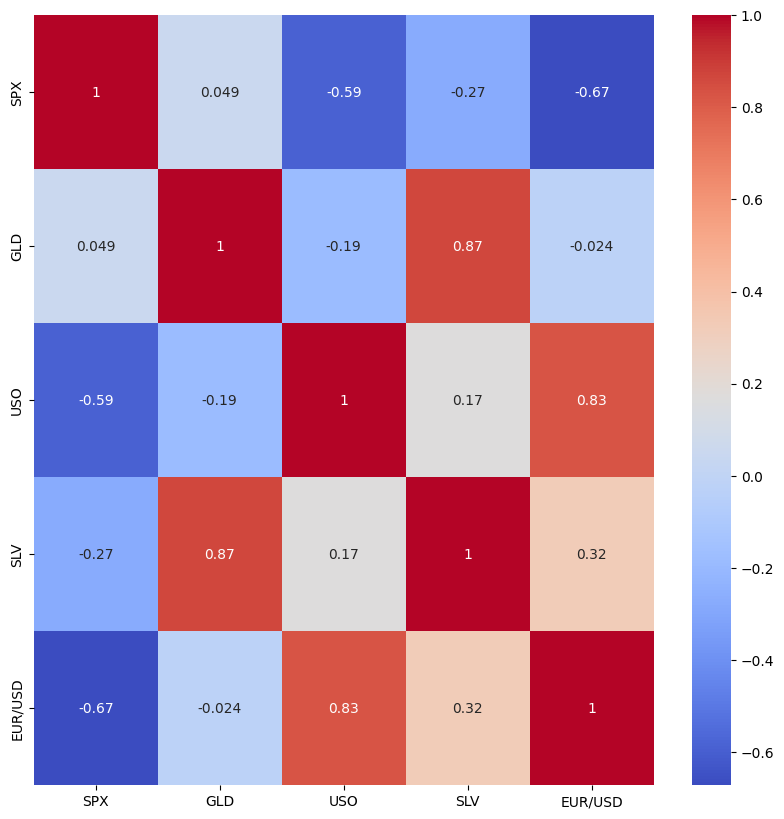

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')


In [ ]:
print(correlation)

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


<ipython-input-52-cf4dd40513ad>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'],color='blue')


<Axes: xlabel='GLD', ylabel='Density'>

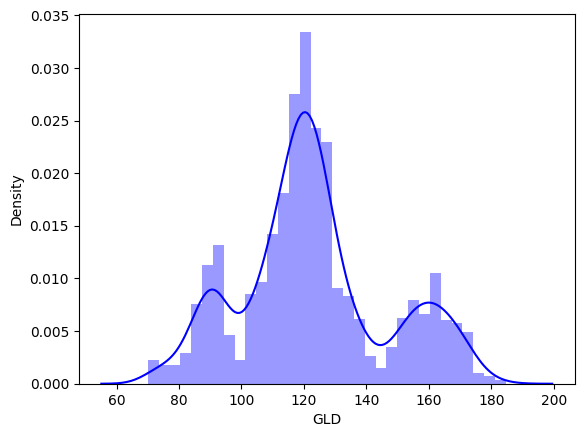

In [ ]:
sns.distplot(df['GLD'],color='blue')


In [ ]:
X=df.drop(['GLD'],axis=1)
Y=df['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [ ]:
# train test and split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
#our model
regressor=RandomForestRegressor(n_estimators=100)

In [ ]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
#model evaluation
test_data_prediction=regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.68029954  81.94239962 115.97059951 127.62770079 120.68320146
 154.63559781 150.62829782 126.08490049 117.58489869 125.95090102
 116.62450086 172.02480104 141.60539852 167.8704979  115.06590001
 117.15290049 139.20330308 170.18440056 159.32870323 159.37629968
 155.24300028 125.30200001 176.01759989 157.44350389 125.1657006
  93.86579968  77.37719979 120.63280003 119.1776998  167.56950025
  87.95800089 125.33950005  91.18020062 117.90659983 120.98339916
 137.00800149 115.20350098 115.16170099 147.65610003 107.11590121
 103.83090234  87.21899809 126.63080064 118.18239976 152.71049915
 119.62539986 108.23750025 107.83439815  93.14120042 127.032098
  75.24110022 113.60199918 121.27490034 111.15909931 119.01859911
 121.00819955 159.41739997 167.81530167 146.89349637  85.81229845
  94.29250015  86.81329904  90.3670999  119.00340081 126.38180037
 127.58109973 168.80169944 122.37739922 117.32149901  98.66070054
 168.56000173 143.30939797 132.72560263 121.27320212 120.77319962
 119.68160037

In [ ]:
#using r squared error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared error:",error_score)

R squared error: 0.9895854353719066


In [ ]:
# compare actula value and predicted values in a plot
Y_test=list(Y_test)

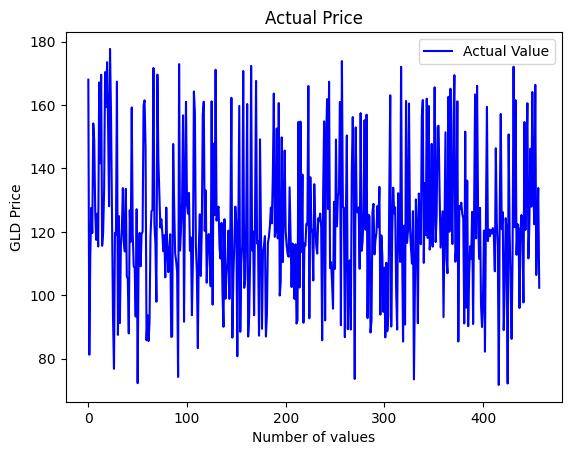

In [ ]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.title('Actual Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

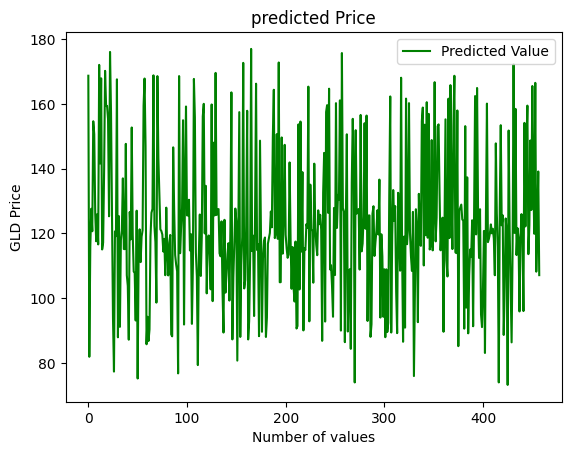

In [ ]:
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()
